In [3]:
import pickle
import os
import numpy as np

num_objs = [11, 8, 5]
difficulties = [3, 2, 1]
probs = [1,2,3,4,5,6,7,8,9,10]
total_time = {11: {3: [], 2: [], 1: []}, 8: {3: [], 2: [], 1: []}, 5: {3: [], 2: [], 1: []}}    
total_time2 = {11: {3: {}, 2: {}, 1: {}}, 8: {3: {}, 2: {}, 1: {}}, 5: {3: {}, 2: {}, 1: {}}}    
total_time3 = {11: {3: {}, 2: {}, 1: {}}, 8: {3: {}, 2: {}, 1: {}}, 5: {3: {}, 2: {}, 1: {}}}    

for num_obj in num_objs:
    for difficulty in difficulties:
        for prob in probs:
            trials = 5
            max_trial = 6

            for trial in range(max_trial-trials,max_trial):
                # print(' number of objects: ', num_obj, ', difficulty level: ', difficulty, 
                #       ', prob: ', prob, ', trial: ', trial, '...')
                # if the result file already exists, skip
                fname = 'prob-%d-%d-%d-trial-%d-result.pkl' % (num_obj, difficulty, prob, trial)
                if os.path.exists(fname):
                    f = open(fname, 'rb')
                    data = pickle.load(f)
                    running_time = data['running_time']
                    f.close()

                    if num_obj == 11 and difficulty == 3 and prob == 1 and trial == 2:
                        print(data)
                    if num_obj == 11 and difficulty == 3 and prob == 4 and trial == 2:
                        print(data)
                    if num_obj == 11 and difficulty == 1 and prob == 7 and trial == 2:
                        print(data)

                    if 'final_occluded_volume' not in data:
                        print('final_occluded_volume not in data')
                        print('num_obj = %d, difficulty = %d, prob = %d, trial = %d' % \
                            (num_obj, difficulty, prob, trial))

                    if data['num_reconstructed_objs'] != num_obj:
                        print('num_reconstructed_objs does not match')
                        print('num_obj = %d, difficulty = %d, prob = %d, trial = %d' % \
                            (num_obj, difficulty, prob, trial))
                        print(data)

                    total_time[num_obj][difficulty].append(running_time)
                    if prob not in total_time2[num_obj][difficulty]:
                        total_time2[num_obj][difficulty][prob] = []
                    total_time2[num_obj][difficulty][prob].append(running_time)
            total_time3[num_obj][difficulty][prob] = np.mean(total_time2[num_obj][difficulty][prob])

final_occluded_volume not in data
num_obj = 11, difficulty = 3, prob = 1, trial = 1
{'num_reconstructed_objs': 11, 'num_collision': 0, 'running_time': 1489.9169340133667, 'num_executed_actions': 22, 'perception_time': 169.40257024765015, 'motion_planning_time': 131.28762340545654, 'pose_generation_time': 115.11118578910828, 'rearrange_time': 1042.770200252533, 'ros_time': 94.75422406196594, 'perception_calls': 317, 'motion_planning_calls': 103, 'pose_generation_calls': 98, 'rearrange_calls': 8, 'execution_calls': 743, 'rearrange_motion_planning_time': 510.22119212150574, 'rearrange_pose_generation_time': 444.5714967250824, 'rearrange_motion_planning_calls': 163, 'rearrange_pose_generation_calls': 339}
final_occluded_volume not in data
num_obj = 11, difficulty = 3, prob = 1, trial = 2
final_occluded_volume not in data
num_obj = 11, difficulty = 3, prob = 1, trial = 3
final_occluded_volume not in data
num_obj = 11, difficulty = 3, prob = 1, trial = 4
final_occluded_volume not in data
num

In [4]:
for num_obj in num_objs:
    for difficulty in difficulties:
        total_time[num_obj][difficulty] = np.array(total_time[num_obj][difficulty])


In [6]:
total_time

{11: {3: array([ 646.08201289, 1489.91693401,  618.04483223,  614.13384652,
          599.90416694,  770.05149555,  698.62926316,  732.07502127,
          777.60171437,  852.80943346,  624.44934797,  582.37133312,
          632.13316226,  612.14733768,  523.88736773,  599.6979661 ,
         4641.88226604,  798.16753459,  694.19657183,  762.19414067,
          629.23971272,  557.51302791,  508.85314178,  600.04685664,
          643.97863483,  533.72756767,  653.37965035,  467.37915492,
          582.53877664,  659.02538919,  702.9312067 ,  860.39273524,
          669.77213407,  715.79171491,  637.6536696 ,  543.33666015,
          582.88920784,  564.57267022,  620.40545654,  530.99640536,
          641.08552551,  614.03375816,  636.29345536,  619.03326011,
          598.9170289 ,  559.34309316,  626.53283167,  578.21446419,
          572.06749415,  637.53811765]),
  2: array([490.98448062, 539.57217526, 546.5931046 , 654.29677391,
         509.00740266, 481.53640866, 529.27366161, 522.5

0.96


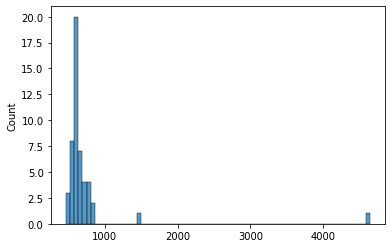

In [19]:
import pandas as pd
import seaborn as sb

sb.histplot(data=total_time[11][3])
print((total_time[11][3]<900).sum() / len(total_time[11][3]))

1.0


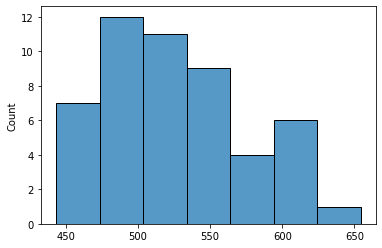

In [26]:
sb.histplot(data=total_time[11][2])
print((total_time[11][2]<800).sum() / len(total_time[11][2]))

0.96


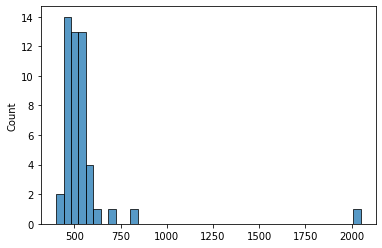

In [25]:
sb.histplot(data=total_time[11][1])
print((total_time[11][1]<700).sum() / len(total_time[11][1]))

0.96


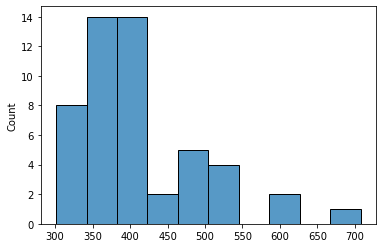

In [31]:
sb.histplot(data=total_time[8][3])
print((total_time[8][3]<600).sum() / len(total_time[8][3]))

0.98


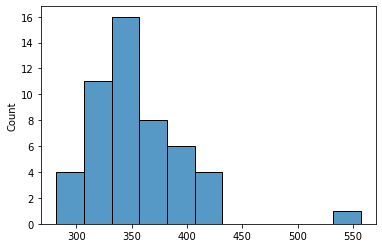

In [32]:
sb.histplot(data=total_time[8][2])
print((total_time[8][2]<500).sum() / len(total_time[8][2]))

0.96


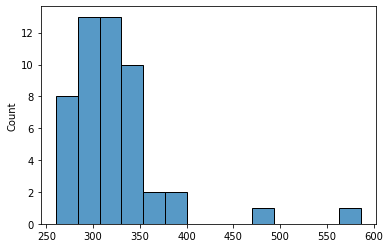

In [39]:
sb.histplot(data=total_time[8][1])
print((total_time[8][1]<400).sum() / len(total_time[8][1]))

1.0


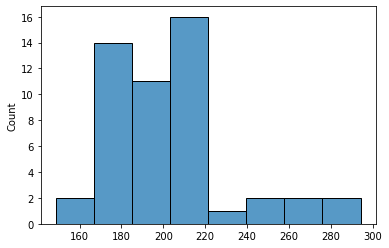

In [41]:
sb.histplot(data=total_time[5][3])
print((total_time[5][3]<300).sum() / len(total_time[5][3]))

0.98


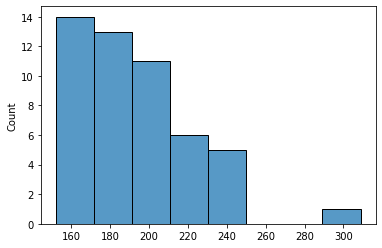

In [42]:
sb.histplot(data=total_time[5][2])
print((total_time[5][2]<300).sum() / len(total_time[5][2]))

1.0


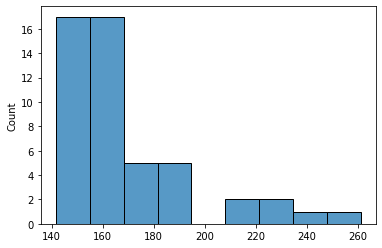

In [43]:
sb.histplot(data=total_time[5][1])
print((total_time[5][1]<300).sum() / len(total_time[5][1]))